In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = Path('Resources/lending_data.csv')

df_loan = pd.read_csv(path)

# Review the DataFrame
df_loan.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

### Exploratory Data Analysis:

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_loan['loan_status']

# Separate the X variable, the features
X = df_loan.drop(columns='loan_status')


<Axes: xlabel='loan_status'>

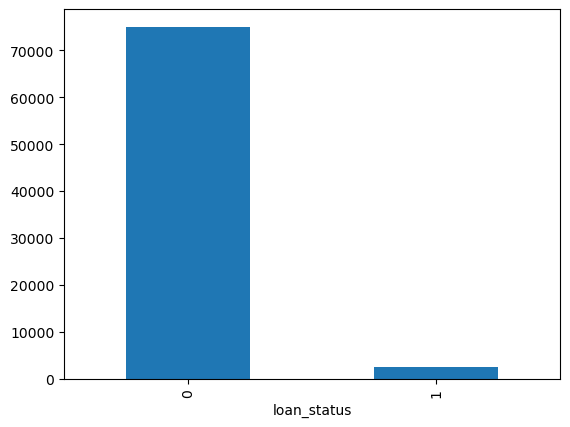

In [4]:
# To see the distribution of output classes:
y.value_counts().plot(kind="bar")

### The data is imbalanced: Following are the possible solutions;
1. Over Smapling
2. Under Sampling

- SMOTE
- SOMTEEN

In [5]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
xtrain, xtest, ytrain, ytest = train_test_split(X,y, stratify = y,shuffle=True, test_size=0.3, random_state=40)

In [12]:
xtrain.shape, ytrain.shape

((54275, 7), (54275,))

In [13]:
len(ytrain[ytrain == 1]) / len(y[y==1])

0.7

In [14]:
len(ytest[ytest == 1]) / len(y[y==1])

0.3

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
lr = LogisticRegression()
# Fit the model using training data
# YOUR CODE HERE!
lr.fit(xtrain,ytrain)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [16]:
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = lr.predict(xtest)

In [17]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
probabilites_predictions = lr.predict_proba(xtest)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [24]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
true_labels = ["Actual True", "Actual False"]
pred_labels = ["Pred True", "Pred False"]
cm = confusion_matrix(ytest, predictions)
pd.DataFrame(cm, index=pred_labels, columns=true_labels)

,Actual True,Actual False
Pred True,22380,131
Pred False,54,696


In [25]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22511
           1       0.84      0.93      0.88       750

    accuracy                           0.99     23261
   macro avg       0.92      0.96      0.94     23261
weighted avg       0.99      0.99      0.99     23261



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---